Word based text generation  using LSTM model

the training texts are samples from the following texts --

https://www.tibethouse.jp/about/buddhism/text/pdfs/Bodhisattvas_way_English.pdf
http://promienie.net/images/dharma/books/shantideva_way-of-bodhisattva.pdf


In [1]:
#importing all required libraries 
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
#getting the text file from google drive
#to load from google drive ,upload the training file given in mail in 'My drive' 
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
path = "/content/drive/My Drive/latest.txt" #path to file in drive 

In [6]:
#reading the file
with open(path, 'r' , encoding = "utf-8") as file:  
  filer = file.read()

In [8]:
import re
filer = re.sub("\d+", "", filer) #to remove the digits/numbers from text


In [37]:
filer[0:50]

'. All that we are is the result of what we have th'

creating tokens and word , value dict of vocabulory 

In [10]:
tokenizer = Tokenizer() #creates a instance of Tokenizer

corpus = filer.lower().split("\n.") # creates a list of strings seperated by "\n."

tokenizer.fit_on_texts(corpus) #tkenizer creates tokens on the data in corpus
word_index = tokenizer.word_index # return dict of key as words and value being their the rank of occurence  
total_words = len(tokenizer.word_index) +1

print(word_index)
print(total_words)


{'the': 1, 'of': 2, 'and': 3, 'a': 4, 'is': 5, 'to': 6, 'who': 7, 'in': 8, 'he': 9, 'not': 10, 'i': 11, 'for': 12, 'by': 13, 'all': 14, 'man': 15, 'as': 16, 'his': 17, 'from': 18, 'that': 19, 'if': 20, 'this': 21, 'be': 22, 'are': 23, 'with': 24, 'will': 25, 'it': 26, 'him': 27, 'has': 28, 'like': 29, 'no': 30, 'mind': 31, 'world': 32, 'an': 33, 'but': 34, 'have': 35, 'evil': 36, 'do': 37, 'there': 38, 'what': 39, 'when': 40, 'they': 41, 'on': 42, 'or': 43, 'let': 44, 'those': 45, 'good': 46, 'their': 47, 'wise': 48, 'does': 49, 'my': 50, 'one': 51, 'even': 52, 'brahmana': 53, 'me': 54, 'free': 55, 'law': 56, 'indeed': 57, 'may': 58, 'shall': 59, 'life': 60, 'well': 61, 'himself': 62, 'body': 63, 'call': 64, 'then': 65, 'pain': 66, 'always': 67, 'men': 68, 'them': 69, 'never': 70, 'happiness': 71, 'should': 72, 'up': 73, 'without': 74, 'own': 75, 'people': 76, 'again': 77, 'such': 78, 'death': 79, 'which': 80, 'great': 81, 'done': 82, 'others': 83, 'nor': 84, 'at': 85, 'having': 86, 'c

In [25]:
#example sentences from the corpus
corpus[0:10]

['. all that we are is the result of what we have thought: it is founded on our thoughts, it is made up of our thoughts. if a man speaks or acts with an evil thought, pain follows him, as the wheel follows the foot of the ox that draws the carriage.',
 ' all that we are is the result of what we have thought: it is founded on our thoughts, it is made up of our thoughts. if a man speaks or acts with a pure thought, happiness follows him, like a shadow that never leaves him.',
 ' "he abused me, he beat me, he defeated me, he robbed me,"—in those who harbour such thoughts hatred will never cease.',
 ' "he abused me, he beat me, he defeated me, he robbed me,"—in those who do not harbour such thoughts hatred will cease.',
 ' for hatred does not cease by hatred at any time: hatred ceases by love, this is an old rule.',
 ' the world does not know that we must all come to an end here;—but those who know it, their quarrels cease at once.',
 ' he who lives looking for pleasures only, his senses u

creating the training data

In [12]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0] # 
	for i in range(1, len(token_list)):
		sequence_slices = token_list[:i+1] #sequences of length starting from 2 to end of sentence
		input_sequences.append(sequence_slices)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')) #padding seuences apecifying the maximum length of sequence and the type of padding 
#pre padding starts padding 0s from start 
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1] #xs are the input sequence without the last eement and last element for each sequence is its corresponding label

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) #one hot encodings of the labels

In [13]:
print(tokenizer.word_index)

{'the': 1, 'of': 2, 'and': 3, 'a': 4, 'is': 5, 'to': 6, 'who': 7, 'in': 8, 'he': 9, 'not': 10, 'i': 11, 'for': 12, 'by': 13, 'all': 14, 'man': 15, 'as': 16, 'his': 17, 'from': 18, 'that': 19, 'if': 20, 'this': 21, 'be': 22, 'are': 23, 'with': 24, 'will': 25, 'it': 26, 'him': 27, 'has': 28, 'like': 29, 'no': 30, 'mind': 31, 'world': 32, 'an': 33, 'but': 34, 'have': 35, 'evil': 36, 'do': 37, 'there': 38, 'what': 39, 'when': 40, 'they': 41, 'on': 42, 'or': 43, 'let': 44, 'those': 45, 'good': 46, 'their': 47, 'wise': 48, 'does': 49, 'my': 50, 'one': 51, 'even': 52, 'brahmana': 53, 'me': 54, 'free': 55, 'law': 56, 'indeed': 57, 'may': 58, 'shall': 59, 'life': 60, 'well': 61, 'himself': 62, 'body': 63, 'call': 64, 'then': 65, 'pain': 66, 'always': 67, 'men': 68, 'them': 69, 'never': 70, 'happiness': 71, 'should': 72, 'up': 73, 'without': 74, 'own': 75, 'people': 76, 'again': 77, 'such': 78, 'death': 79, 'which': 80, 'great': 81, 'done': 82, 'others': 83, 'nor': 84, 'at': 85, 'having': 86, 'c

build and train the model

In [15]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))  #to represent the tokens as vectors of 100dim
model.add(Bidirectional(LSTM(150))) #bidirectional lstm which outputs 300 units
model.add(Dense(total_words, activation='softmax')) # dense layer with softmax layer pedicting the max probabiity of word between the tota words
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()
history = model.fit(xs, ys, epochs=30, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5119, 100)         254400    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_1 (Dense)              (None, 2544)              765744    
Total params: 1,321,344
Trainable params: 1,321,344
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
507/507 [==============================] - 703s 1s/step - loss: 6.1532 - accuracy: 0.0977
Epoch 2/30
507/507 [==============================] - 696s 1s/step - loss: 4.9710 - accuracy: 0.1860
Epoch 3/30
507/507 [==============================] - 698s 1s/step - loss: 3.9522 - accuracy: 0.2612
Epoch 4/30
507/507 [==============================] - 696s 1s/step - lo

In [16]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

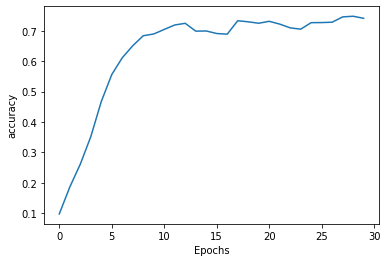

In [17]:
plot_graphs(history, 'accuracy')


Generating Text , given a seed sentence and specifing the number of words to generate

In [38]:
seed_text = "I've got a bad feeling about this world"
next_words = 25
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)

I've got a bad feeling about this world like the moon when freed from clouds of the evil deed is better left undone for a man wishes neither one ought to one knows
